In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


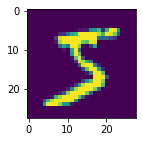

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])

In [5]:
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


In [6]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_train_flattened.shape

(60000, 784)

In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train = minmax.fit_transform(x_train_flattened)
X_test = minmax.transform(x_test_flattened)

In [8]:
X_train.shape

(60000, 784)

In [9]:
Ann_model=keras.Sequential([
    keras.layers.Dense(360,input_dim = X_train.shape[1],activation="relu"),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(170,activation="relu"),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(100,activation="relu"),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
Ann_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
Ann_model.fit(X_train,y_train,epochs=12)

Epoch 1/12
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2410 - accuracy: 0.9279
Epoch 2/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0972 - accuracy: 0.9703
Epoch 3/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0685 - accuracy: 0.9782
Epoch 4/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0531 - accuracy: 0.9834
Epoch 5/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0415 - accuracy: 0.9871
Epoch 6/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 7/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9910
Epoch 8/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0262 - accuracy: 0.9920
Epoch 9/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 10/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02

In [10]:
Ann_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0939 - accuracy: 0.9809


[0.09392622113227844, 0.98089998960495]

In [11]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [12]:
Cnn_model=keras.Sequential([
    #CNN
    keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    #ANN
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    
    keras.layers.Dense(10,activation='softmax')
])
Cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
Cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1536 - accuracy: 0.9526
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0492 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0352 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0261 - accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0119 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0097 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [13]:
Cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0388 - accuracy: 0.9890


[0.03882751613855362, 0.9890000224113464]